In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data=pd.read_csv(r"C:\Users\student.LAB-AI-061\Downloads\sales_data.csv")
data.head()

,store_id,customer_id,product_id,product_category,date,amount,single_price,transaction_id
0,Store 01,Customer 1508,53642,Toys,4/1/2007 8:09,3,90.246230,1
1,Store 15,Customer 169,90945,Movies,2/15/2005 10:47,2,60.586312,2
2,Store 12,Customer 124,18548,Movies,9/27/2007 5:38,5,96.612695,3
3,Store 05,Customer 1988,85359,Books,5/7/2005 13:19,5,16.962671,4
4,Store 01,Customer 475,80069,Clothing,1/6/2008 17:36,5,65.215310,5


# 1.	Choose any appropriate dataset of your choice. Import the dataset using Pandas. Display the first few rows of the dataset and summarize the data types and structure. Calculate and interpret the mean, median, and mode for numerical variables. Calculate and interpret the range, variance, standard deviation, and interquartile range (IQR) for numerical variables.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          100 non-null    object 
 1   customer_id       100 non-null    object 
 2   product_id        100 non-null    int64  
 3   product_category  100 non-null    object 
 4   date              100 non-null    object 
 5   amount            100 non-null    int64  
 6   single_price      100 non-null    float64
 7   transaction_id    100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [39]:
print("*******************Mean***************")
print(data.mean())
print("*******************Median***************")
print(data.median())
print("*******************Mode***************")
print(data.mode().values[0])

*******************Mean***************
product_id        54612.050000
amount                4.620000
single_price         55.612891
transaction_id       50.500000
dtype: float64
*******************Median***************
product_id        54460.500000
amount                5.000000
single_price         55.206419
transaction_id       50.500000
dtype: float64
*******************Mode***************
['Store 10' 'Customer 741' 10204 'Electronics' '1/14/2007 13:06' 5.0
 10.8480142 1]


In [40]:
data.std()

product_id        27321.521014
amount                2.465028
single_price         25.798828
transaction_id       29.011492
dtype: float64

In [41]:
data.var()

product_id        7.464655e+08
amount            6.076364e+00
single_price      6.655795e+02
transaction_id    8.416667e+02
dtype: float64

In [42]:
ran_amount=data.amount.max()-data.amount.min()
ran_single_price=data.single_price.max()-data.single_price.min()
ran_transaction=data.transaction_id.max()-data.transaction_id.min()
ran_product_id=data.product_id.max()-data.product_id.min()
print("amount range",ran_amount)
print("single price range",ran_single_price)
print("transaction id range",ran_transaction)
print("range of product catagory",ran_product_id)


amount range 8
single price range 88.30866458
transaction id range 99
range of product catagory 89441


# 2.	Identify and handle missing values in the dataset through imputation (filling in missing values using a reasonable estimate) or deletion. Identify and visualize outliers using box plots and z-scores. Decide on methods to handle outliers (e.g., removal, transformation).

In [43]:
def cal_missing_values(df): 
    missing_count=df.isnull().sum().sort_values(ascending=False)
    missing_percent=round(missing_count/len(data)*100,2)
    missing_info=pd.concat([missing_count,missing_percent],axis=1,
    keys=["missing value count","percentage of missing values"])
    return missing_info
print("*"*20,"missing value information of training data","*"*20)
print(cal_missing_values(data))

******************** missing value information of training data ********************
                  missing value count  percentage of missing values
store_id                            0                           0.0
customer_id                         0                           0.0
product_id                          0                           0.0
product_category                    0                           0.0
date                                0                           0.0
amount                              0                           0.0
single_price                        0                           0.0
transaction_id                      0                           0.0


<AxesSubplot:xlabel='amount', ylabel='single_price'>

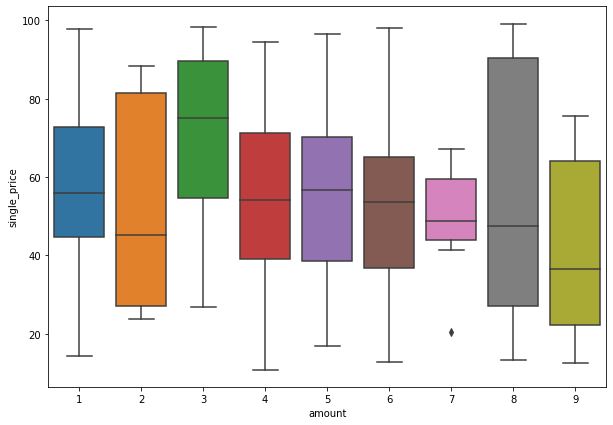

In [44]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data["amount"],y=data["single_price"])

# 3.	Create histograms and box plots for numerical variables, and bar charts for categorical variables. Use scatter plots to explore relationships between numerical variables, and pair plots and correlation matrices for multiple variables. Visualize and interpret trends over time or across different variables

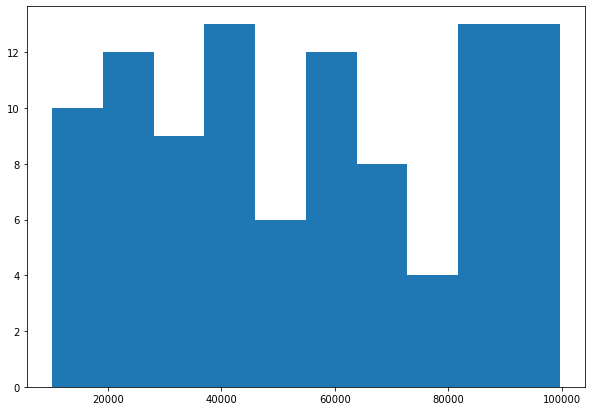

In [46]:
plt.figure(figsize=(10,7))
plt.hist(data['product_id'])
plt.show()

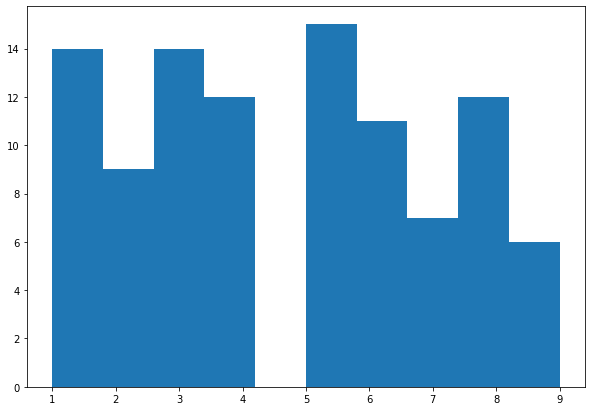

In [47]:
plt.figure(figsize=(10,7))
plt.hist(data['amount'])
plt.show()

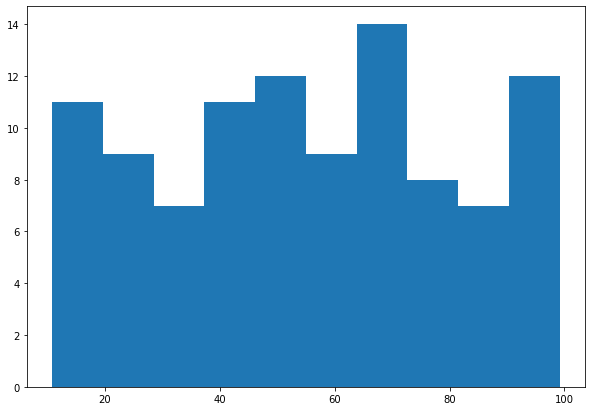

In [48]:
plt.figure(figsize=(10,7))
plt.hist(data['single_price'])
plt.show()

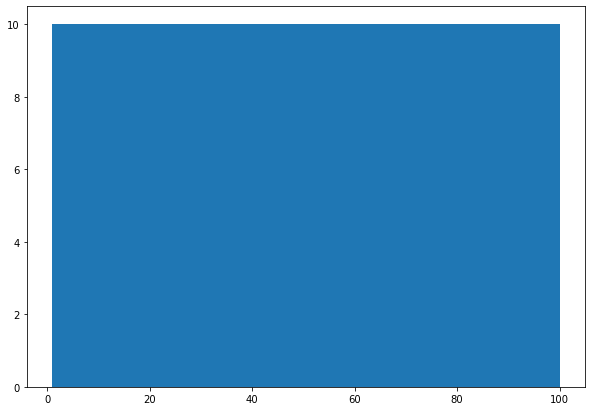

In [49]:
plt.figure(figsize=(10,7))
plt.hist(data['transaction_id'])
plt.show()

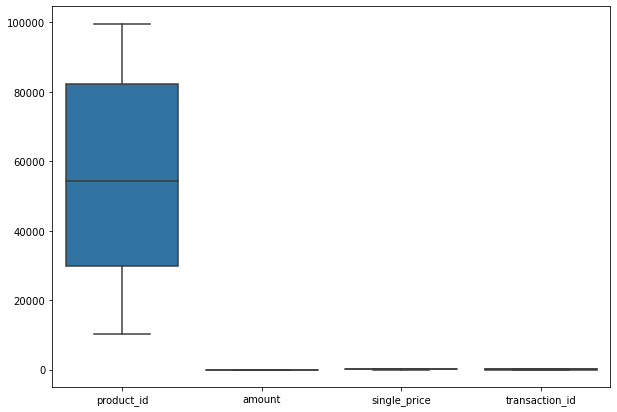

In [52]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data)
plt.show()

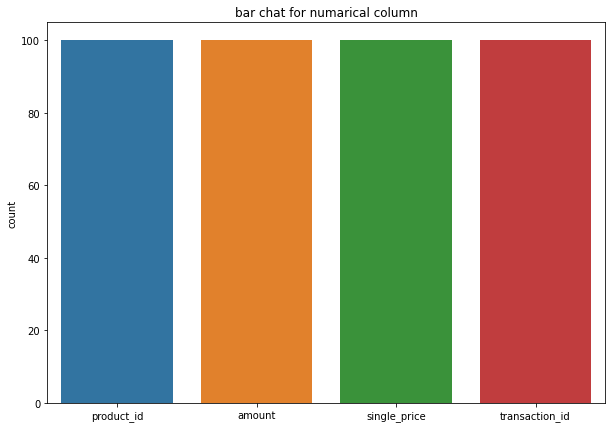

In [53]:
plt.figure(figsize=(10,7))
sns.countplot(data=data)
plt.title("bar chat for numarical column")
plt.show()

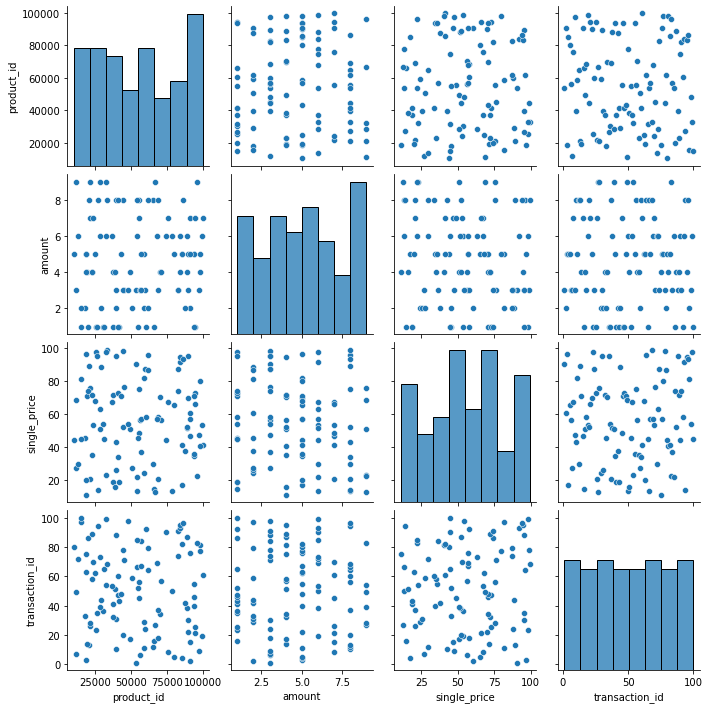

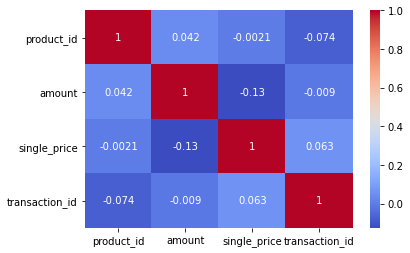

In [57]:
sns.pairplot(data)
plt.show()
corelation=data.corr()
sns.heatmap(corelation ,annot=True ,cmap="coolwarm")
plt.show()